# README

Dear TA, because of my carelessness, I realized that we are expected to implement Problem 2.1 in Tensorflow and Keras at the time when I have finished implementation in PyTorch.

The place where the Tensorflow and Kera is used is in the second half of this .ipynb file, please see the end.

Moreover, I have applied all regularization methods and all optimizers we introduced during lecture.

Thanks a lot!

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import torch.utils.data as Data
from torchvision.datasets import MNIST,FashionMNIST
from torchvision import transforms

In [2]:
transform = transforms.Compose([transforms.ToTensor()])
data_train = MNIST(root = "data/", 
          transform = transform, ## 图像变换操作
          train =True, ## 决定使用训练集还是测试集
          download = True) ## 选择是否需要下载数据
data_test = MNIST(root = "data/",
          transform = transform,
          train =False)

In [3]:
print(len(data_train))
print(len(data_test))

60000
10000


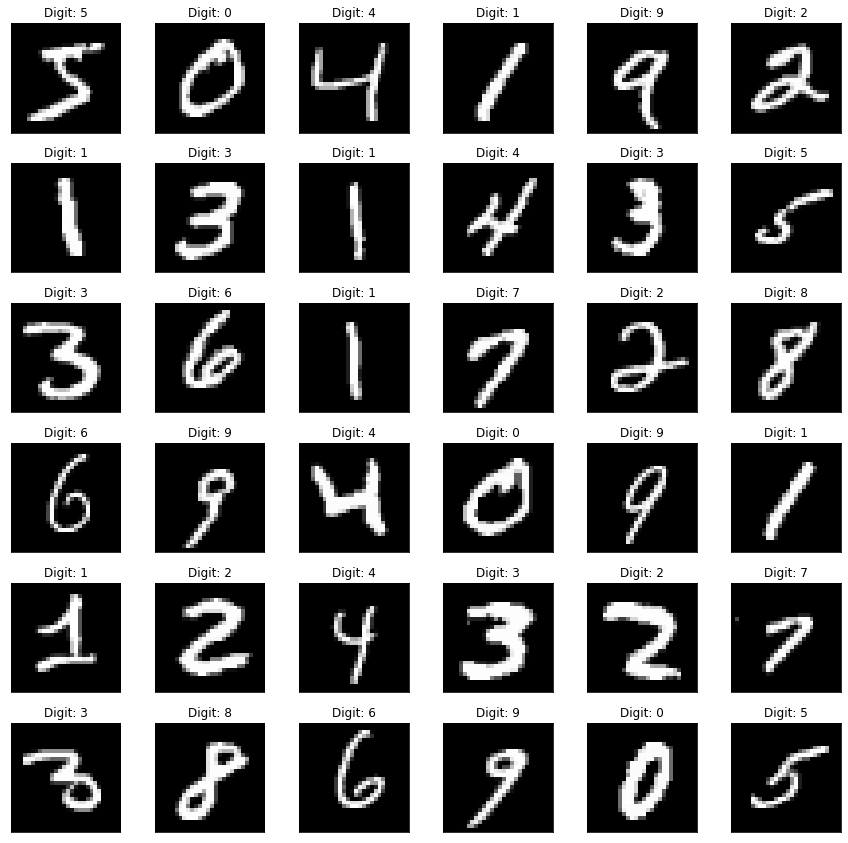

In [4]:
fig = plt.figure(figsize=(12, 12))
for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.tight_layout()
    plt.imshow(data_train[i][0].numpy().reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(data_train[i][1]))
    plt.xticks([])
    plt.yticks([])

Text(0.5, 1.0, 'Pixel Value Distribution')

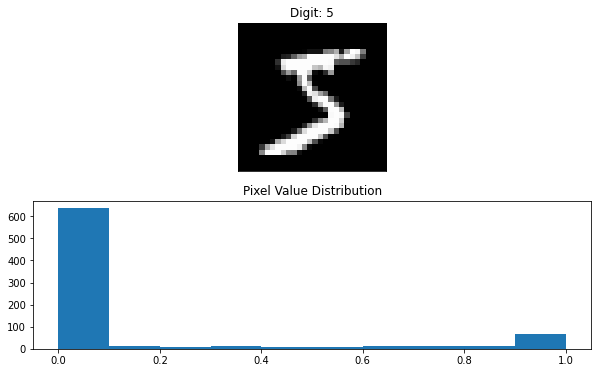

In [5]:
fig = plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.imshow(data_train[0][0].numpy().reshape(28,28), cmap='gray', interpolation='none')
plt.title("Digit: {}".format(data_train[0][1]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(data_train[0][0].numpy().reshape(784))
plt.title("Pixel Value Distribution")

In [6]:
batch_size = 256

In [7]:
train_loader = Data.DataLoader(dataset=data_train,
                               batch_size=batch_size,
                               shuffle=True)
test_loader = Data.DataLoader(dataset=data_test,
                              batch_size=batch_size,
                              shuffle=True)

In [8]:
mlp = nn.Sequential(nn.Flatten(),
           nn.Linear(784,512),
           nn.ReLU(),
           nn.Dropout(p=0.2),
           nn.Linear(512,512),
           nn.ReLU(),
           nn.Dropout(p=0.2),
           nn.Linear(512,512), 
           nn.ReLU(),
           nn.Dropout(p=0.2),
           nn.Linear(512,10))

In [9]:
lr, num_epochs = 0.001, 2000 ## 定义学习率及训练次数
optimizer = torch.optim.SGD(mlp.parameters(), lr = lr) ## 定义优化器
loss_func = nn.CrossEntropyLoss(reduction='mean') ## 定义损失函数，分类问题一般使用交叉熵损失

train_loss_all = []
train_acc_all = []
test_acc_all = []
test_loss_all = []

for epoch in range(num_epochs):
    print("Epoch {}/{}".format(epoch+1,num_epochs))
    
    running_loss = 0.0
    running_correct = 0.0
    
    for X, y in train_loader:
        mlp.train() ## 表明模型在训练
        output = mlp.forward(X) ## 模型在 X 上的输出: N * num_class
        train_loss = loss_func(output, y ) ## 交叉熵误差
        _, pred = torch.max(output.data, 1) ## 获得预测结果
        optimizer.zero_grad() ## 每次迭代将梯度初始化为0
        train_loss.backward() ## 损失的后向传播， 计算梯度
        optimizer.step() ## 使用梯度进行优化
        running_loss += train_loss.item() ## 统计模型预测损失
        running_correct += torch.sum(pred == y.data) ## 统计模型预测准确个数
        
    test_correct = 0
    val_loss = 0
    for data in test_loader:
        X_test, y_test = data        
        output = mlp(X_test)
        test_loss = loss_func(output, y_test )
        _, pred = torch.max(output.data, 1)
        test_correct += torch.sum(pred == y_test.data)
        val_loss += test_loss.item()
    print("Loss is:{:.4f}, Train_accuracy is {:.4f}%, Test_accuracy is {:.4f}%"
          .format(running_loss/len(train_loader),100*running_correct/len(data_train), 100*test_correct/len(data_test)))
    print("="*80)
    train_loss_all.append(running_loss/len(train_loader))
    train_acc_all.append(running_correct/len(data_train))
    test_loss_all.append(val_loss/len(test_loader))
    test_acc_all.append(test_correct/len(data_test))

Epoch 1/2000
Loss is:2.3026, Train_accuracy is 9.9850%, Test_accuracy is 10.3000%
Epoch 2/2000
Loss is:2.3008, Train_accuracy is 10.1633%, Test_accuracy is 10.5200%
Epoch 3/2000
Loss is:2.2990, Train_accuracy is 10.4133%, Test_accuracy is 10.9100%
Epoch 4/2000
Loss is:2.2972, Train_accuracy is 10.6133%, Test_accuracy is 10.8800%
Epoch 5/2000
Loss is:2.2954, Train_accuracy is 10.9950%, Test_accuracy is 11.3200%
Epoch 6/2000
Loss is:2.2935, Train_accuracy is 11.4733%, Test_accuracy is 12.2000%
Epoch 7/2000
Loss is:2.2916, Train_accuracy is 12.1767%, Test_accuracy is 13.0600%
Epoch 8/2000
Loss is:2.2896, Train_accuracy is 13.4700%, Test_accuracy is 14.5100%
Epoch 9/2000
Loss is:2.2874, Train_accuracy is 15.7833%, Test_accuracy is 17.2800%
Epoch 10/2000
Loss is:2.2853, Train_accuracy is 18.9400%, Test_accuracy is 21.1800%
Epoch 11/2000
Loss is:2.2829, Train_accuracy is 22.7900%, Test_accuracy is 25.7700%
Epoch 12/2000
Loss is:2.2805, Train_accuracy is 27.1967%, Test_accuracy is 29.9900%
Ep

Loss is:1.0237, Train_accuracy is 70.2950%, Test_accuracy is 71.4500%
Epoch 52/2000
Loss is:0.9884, Train_accuracy is 71.1417%, Test_accuracy is 71.9700%
Epoch 53/2000
Loss is:0.9572, Train_accuracy is 71.7850%, Test_accuracy is 72.6000%
Epoch 54/2000
Loss is:0.9318, Train_accuracy is 72.1433%, Test_accuracy is 73.5000%
Epoch 55/2000
Loss is:0.9054, Train_accuracy is 72.6683%, Test_accuracy is 74.1300%
Epoch 56/2000
Loss is:0.8819, Train_accuracy is 73.5083%, Test_accuracy is 74.5800%
Epoch 57/2000
Loss is:0.8605, Train_accuracy is 73.8767%, Test_accuracy is 74.6100%
Epoch 58/2000
Loss is:0.8401, Train_accuracy is 74.6133%, Test_accuracy is 75.0900%
Epoch 59/2000
Loss is:0.8233, Train_accuracy is 74.8733%, Test_accuracy is 75.7300%
Epoch 60/2000
Loss is:0.8048, Train_accuracy is 75.4750%, Test_accuracy is 76.4600%
Epoch 61/2000
Loss is:0.7901, Train_accuracy is 75.8733%, Test_accuracy is 76.7000%
Epoch 62/2000
Loss is:0.7754, Train_accuracy is 76.2483%, Test_accuracy is 77.2000%
Epoch 

Loss is:0.4899, Train_accuracy is 85.5567%, Test_accuracy is 86.0800%
Epoch 102/2000
Loss is:0.4846, Train_accuracy is 85.8533%, Test_accuracy is 85.9500%
Epoch 103/2000
Loss is:0.4860, Train_accuracy is 85.9167%, Test_accuracy is 86.7000%
Epoch 104/2000
Loss is:0.4805, Train_accuracy is 85.9350%, Test_accuracy is 86.9100%
Epoch 105/2000
Loss is:0.4781, Train_accuracy is 85.9600%, Test_accuracy is 86.4700%
Epoch 106/2000
Loss is:0.4730, Train_accuracy is 86.1450%, Test_accuracy is 86.3100%
Epoch 107/2000
Loss is:0.4698, Train_accuracy is 86.3567%, Test_accuracy is 86.5600%
Epoch 108/2000
Loss is:0.4670, Train_accuracy is 86.3067%, Test_accuracy is 86.9700%
Epoch 109/2000
Loss is:0.4609, Train_accuracy is 86.4533%, Test_accuracy is 86.6200%
Epoch 110/2000
Loss is:0.4608, Train_accuracy is 86.5017%, Test_accuracy is 86.9100%
Epoch 111/2000
Loss is:0.4578, Train_accuracy is 86.6167%, Test_accuracy is 86.7400%
Epoch 112/2000
Loss is:0.4572, Train_accuracy is 86.6650%, Test_accuracy is 86.8

Loss is:0.3801, Train_accuracy is 89.0433%, Test_accuracy is 89.1300%
Epoch 152/2000
Loss is:0.3768, Train_accuracy is 88.9600%, Test_accuracy is 89.0500%
Epoch 153/2000
Loss is:0.3763, Train_accuracy is 89.0000%, Test_accuracy is 89.2200%
Epoch 154/2000
Loss is:0.3747, Train_accuracy is 89.1367%, Test_accuracy is 89.1500%
Epoch 155/2000
Loss is:0.3742, Train_accuracy is 89.1283%, Test_accuracy is 89.4900%
Epoch 156/2000
Loss is:0.3743, Train_accuracy is 89.1283%, Test_accuracy is 89.6000%
Epoch 157/2000
Loss is:0.3713, Train_accuracy is 89.1817%, Test_accuracy is 89.5000%
Epoch 158/2000
Loss is:0.3709, Train_accuracy is 89.3167%, Test_accuracy is 89.1500%
Epoch 159/2000
Loss is:0.3673, Train_accuracy is 89.3200%, Test_accuracy is 89.7500%
Epoch 160/2000
Loss is:0.3693, Train_accuracy is 89.1917%, Test_accuracy is 89.8100%
Epoch 161/2000
Loss is:0.3661, Train_accuracy is 89.3917%, Test_accuracy is 89.5100%
Epoch 162/2000
Loss is:0.3633, Train_accuracy is 89.5317%, Test_accuracy is 89.7

Loss is:0.3193, Train_accuracy is 90.8133%, Test_accuracy is 90.8000%
Epoch 202/2000
Loss is:0.3207, Train_accuracy is 90.8550%, Test_accuracy is 90.9600%
Epoch 203/2000
Loss is:0.3192, Train_accuracy is 90.7500%, Test_accuracy is 90.7600%
Epoch 204/2000
Loss is:0.3183, Train_accuracy is 90.7433%, Test_accuracy is 90.9300%
Epoch 205/2000
Loss is:0.3163, Train_accuracy is 90.9700%, Test_accuracy is 91.0800%
Epoch 206/2000
Loss is:0.3170, Train_accuracy is 90.7500%, Test_accuracy is 90.9300%
Epoch 207/2000
Loss is:0.3150, Train_accuracy is 90.8667%, Test_accuracy is 91.1800%
Epoch 208/2000
Loss is:0.3145, Train_accuracy is 90.9250%, Test_accuracy is 91.3600%
Epoch 209/2000
Loss is:0.3131, Train_accuracy is 90.8800%, Test_accuracy is 90.8100%
Epoch 210/2000
Loss is:0.3119, Train_accuracy is 91.0000%, Test_accuracy is 90.8700%
Epoch 211/2000
Loss is:0.3111, Train_accuracy is 90.8750%, Test_accuracy is 91.2100%
Epoch 212/2000
Loss is:0.3100, Train_accuracy is 91.0767%, Test_accuracy is 91.1

Loss is:0.2764, Train_accuracy is 92.0300%, Test_accuracy is 92.2500%
Epoch 252/2000
Loss is:0.2747, Train_accuracy is 92.0000%, Test_accuracy is 92.1900%
Epoch 253/2000
Loss is:0.2730, Train_accuracy is 92.0500%, Test_accuracy is 92.1900%
Epoch 254/2000
Loss is:0.2731, Train_accuracy is 92.0867%, Test_accuracy is 91.9600%
Epoch 255/2000
Loss is:0.2740, Train_accuracy is 92.0617%, Test_accuracy is 92.2600%
Epoch 256/2000
Loss is:0.2721, Train_accuracy is 92.0950%, Test_accuracy is 92.3400%
Epoch 257/2000
Loss is:0.2717, Train_accuracy is 92.1350%, Test_accuracy is 92.1400%
Epoch 258/2000
Loss is:0.2710, Train_accuracy is 92.1333%, Test_accuracy is 92.3600%
Epoch 259/2000
Loss is:0.2695, Train_accuracy is 92.1500%, Test_accuracy is 92.2900%
Epoch 260/2000
Loss is:0.2700, Train_accuracy is 92.1300%, Test_accuracy is 92.2900%
Epoch 261/2000
Loss is:0.2655, Train_accuracy is 92.2717%, Test_accuracy is 92.3800%
Epoch 262/2000
Loss is:0.2672, Train_accuracy is 92.1767%, Test_accuracy is 92.3

Loss is:0.2414, Train_accuracy is 92.9900%, Test_accuracy is 93.0000%
Epoch 302/2000
Loss is:0.2408, Train_accuracy is 93.0233%, Test_accuracy is 93.1000%
Epoch 303/2000
Loss is:0.2382, Train_accuracy is 93.0100%, Test_accuracy is 93.2300%
Epoch 304/2000
Loss is:0.2388, Train_accuracy is 93.0700%, Test_accuracy is 92.9100%
Epoch 305/2000
Loss is:0.2359, Train_accuracy is 93.1167%, Test_accuracy is 93.1400%
Epoch 306/2000
Loss is:0.2367, Train_accuracy is 93.0500%, Test_accuracy is 93.2900%
Epoch 307/2000
Loss is:0.2374, Train_accuracy is 93.0250%, Test_accuracy is 92.9300%
Epoch 308/2000
Loss is:0.2359, Train_accuracy is 93.1333%, Test_accuracy is 93.3900%
Epoch 309/2000
Loss is:0.2339, Train_accuracy is 93.2133%, Test_accuracy is 93.1800%
Epoch 310/2000
Loss is:0.2344, Train_accuracy is 93.1567%, Test_accuracy is 92.9400%
Epoch 311/2000
Loss is:0.2346, Train_accuracy is 93.2433%, Test_accuracy is 93.0500%
Epoch 312/2000
Loss is:0.2341, Train_accuracy is 93.1467%, Test_accuracy is 93.3

Loss is:0.2122, Train_accuracy is 93.8200%, Test_accuracy is 93.5500%
Epoch 352/2000
Loss is:0.2123, Train_accuracy is 93.8850%, Test_accuracy is 93.6800%
Epoch 353/2000
Loss is:0.2119, Train_accuracy is 93.8033%, Test_accuracy is 93.8800%
Epoch 354/2000
Loss is:0.2095, Train_accuracy is 93.9283%, Test_accuracy is 93.9400%
Epoch 355/2000
Loss is:0.2088, Train_accuracy is 93.8800%, Test_accuracy is 93.6900%
Epoch 356/2000
Loss is:0.2099, Train_accuracy is 93.8883%, Test_accuracy is 93.7100%
Epoch 357/2000
Loss is:0.2090, Train_accuracy is 93.9700%, Test_accuracy is 93.8000%
Epoch 358/2000
Loss is:0.2082, Train_accuracy is 93.9267%, Test_accuracy is 93.9200%
Epoch 359/2000
Loss is:0.2107, Train_accuracy is 93.8983%, Test_accuracy is 94.0200%
Epoch 360/2000
Loss is:0.2079, Train_accuracy is 94.0267%, Test_accuracy is 93.5800%
Epoch 361/2000
Loss is:0.2079, Train_accuracy is 93.9600%, Test_accuracy is 94.0100%
Epoch 362/2000
Loss is:0.2073, Train_accuracy is 93.9300%, Test_accuracy is 93.9

Loss is:0.1882, Train_accuracy is 94.5250%, Test_accuracy is 94.6800%
Epoch 402/2000
Loss is:0.1882, Train_accuracy is 94.4783%, Test_accuracy is 94.3900%
Epoch 403/2000
Loss is:0.1871, Train_accuracy is 94.5350%, Test_accuracy is 94.4100%
Epoch 404/2000
Loss is:0.1876, Train_accuracy is 94.4883%, Test_accuracy is 94.3300%
Epoch 405/2000
Loss is:0.1874, Train_accuracy is 94.5350%, Test_accuracy is 94.3400%
Epoch 406/2000
Loss is:0.1876, Train_accuracy is 94.4767%, Test_accuracy is 94.3700%
Epoch 407/2000
Loss is:0.1867, Train_accuracy is 94.5950%, Test_accuracy is 94.3300%
Epoch 408/2000
Loss is:0.1865, Train_accuracy is 94.4983%, Test_accuracy is 94.5700%
Epoch 409/2000
Loss is:0.1855, Train_accuracy is 94.6000%, Test_accuracy is 94.4300%
Epoch 410/2000
Loss is:0.1863, Train_accuracy is 94.5500%, Test_accuracy is 94.5300%
Epoch 411/2000
Loss is:0.1857, Train_accuracy is 94.5850%, Test_accuracy is 94.5300%
Epoch 412/2000
Loss is:0.1844, Train_accuracy is 94.6100%, Test_accuracy is 94.3

Loss is:0.1709, Train_accuracy is 95.0267%, Test_accuracy is 94.8000%
Epoch 452/2000
Loss is:0.1713, Train_accuracy is 94.9633%, Test_accuracy is 94.7200%
Epoch 453/2000
Loss is:0.1697, Train_accuracy is 95.0000%, Test_accuracy is 94.7700%
Epoch 454/2000
Loss is:0.1701, Train_accuracy is 95.0033%, Test_accuracy is 94.7700%
Epoch 455/2000
Loss is:0.1687, Train_accuracy is 95.0467%, Test_accuracy is 94.7400%
Epoch 456/2000
Loss is:0.1688, Train_accuracy is 95.1167%, Test_accuracy is 94.6100%
Epoch 457/2000
Loss is:0.1689, Train_accuracy is 95.1600%, Test_accuracy is 95.0000%
Epoch 458/2000
Loss is:0.1682, Train_accuracy is 95.0433%, Test_accuracy is 94.8800%
Epoch 459/2000
Loss is:0.1669, Train_accuracy is 95.1817%, Test_accuracy is 94.7900%
Epoch 460/2000
Loss is:0.1665, Train_accuracy is 95.0867%, Test_accuracy is 94.6500%
Epoch 461/2000
Loss is:0.1680, Train_accuracy is 95.0700%, Test_accuracy is 94.9500%
Epoch 462/2000
Loss is:0.1689, Train_accuracy is 95.0567%, Test_accuracy is 94.9

Loss is:0.1550, Train_accuracy is 95.5133%, Test_accuracy is 95.3000%
Epoch 502/2000
Loss is:0.1544, Train_accuracy is 95.4767%, Test_accuracy is 95.1900%
Epoch 503/2000
Loss is:0.1545, Train_accuracy is 95.5050%, Test_accuracy is 95.1500%
Epoch 504/2000
Loss is:0.1524, Train_accuracy is 95.5367%, Test_accuracy is 95.0900%
Epoch 505/2000
Loss is:0.1529, Train_accuracy is 95.4583%, Test_accuracy is 95.0500%
Epoch 506/2000
Loss is:0.1550, Train_accuracy is 95.4783%, Test_accuracy is 95.0100%
Epoch 507/2000
Loss is:0.1538, Train_accuracy is 95.4733%, Test_accuracy is 95.1900%
Epoch 508/2000
Loss is:0.1521, Train_accuracy is 95.5400%, Test_accuracy is 95.3900%
Epoch 509/2000
Loss is:0.1528, Train_accuracy is 95.4767%, Test_accuracy is 95.2500%
Epoch 510/2000
Loss is:0.1531, Train_accuracy is 95.5583%, Test_accuracy is 95.3000%
Epoch 511/2000
Loss is:0.1517, Train_accuracy is 95.5883%, Test_accuracy is 95.3300%
Epoch 512/2000
Loss is:0.1519, Train_accuracy is 95.5750%, Test_accuracy is 94.9

Loss is:0.1423, Train_accuracy is 95.8167%, Test_accuracy is 95.5600%
Epoch 552/2000
Loss is:0.1417, Train_accuracy is 95.8383%, Test_accuracy is 95.4500%
Epoch 553/2000
Loss is:0.1422, Train_accuracy is 95.7833%, Test_accuracy is 95.6200%
Epoch 554/2000
Loss is:0.1430, Train_accuracy is 95.8300%, Test_accuracy is 95.6000%
Epoch 555/2000
Loss is:0.1410, Train_accuracy is 95.8617%, Test_accuracy is 95.5300%
Epoch 556/2000
Loss is:0.1396, Train_accuracy is 95.9183%, Test_accuracy is 95.4600%
Epoch 557/2000
Loss is:0.1429, Train_accuracy is 95.8317%, Test_accuracy is 95.5900%
Epoch 558/2000
Loss is:0.1403, Train_accuracy is 95.8750%, Test_accuracy is 95.4700%
Epoch 559/2000
Loss is:0.1400, Train_accuracy is 95.8883%, Test_accuracy is 95.7000%
Epoch 560/2000
Loss is:0.1407, Train_accuracy is 95.8650%, Test_accuracy is 95.5600%
Epoch 561/2000
Loss is:0.1408, Train_accuracy is 95.8483%, Test_accuracy is 95.5300%
Epoch 562/2000
Loss is:0.1390, Train_accuracy is 95.9200%, Test_accuracy is 95.7

Loss is:0.1312, Train_accuracy is 96.1133%, Test_accuracy is 95.8700%
Epoch 602/2000
Loss is:0.1304, Train_accuracy is 96.1633%, Test_accuracy is 95.7100%
Epoch 603/2000
Loss is:0.1311, Train_accuracy is 96.1017%, Test_accuracy is 95.8400%
Epoch 604/2000
Loss is:0.1295, Train_accuracy is 96.2517%, Test_accuracy is 95.8300%
Epoch 605/2000
Loss is:0.1298, Train_accuracy is 96.1750%, Test_accuracy is 95.6800%
Epoch 606/2000
Loss is:0.1301, Train_accuracy is 96.1683%, Test_accuracy is 95.7700%
Epoch 607/2000
Loss is:0.1286, Train_accuracy is 96.1967%, Test_accuracy is 96.0100%
Epoch 608/2000
Loss is:0.1289, Train_accuracy is 96.2533%, Test_accuracy is 96.0000%
Epoch 609/2000
Loss is:0.1276, Train_accuracy is 96.3000%, Test_accuracy is 95.7900%
Epoch 610/2000
Loss is:0.1279, Train_accuracy is 96.2600%, Test_accuracy is 95.8100%
Epoch 611/2000
Loss is:0.1287, Train_accuracy is 96.2017%, Test_accuracy is 95.7500%
Epoch 612/2000
Loss is:0.1280, Train_accuracy is 96.2733%, Test_accuracy is 95.8

Loss is:0.1205, Train_accuracy is 96.4767%, Test_accuracy is 95.8500%
Epoch 652/2000
Loss is:0.1216, Train_accuracy is 96.3833%, Test_accuracy is 95.7800%
Epoch 653/2000
Loss is:0.1207, Train_accuracy is 96.4733%, Test_accuracy is 95.9700%
Epoch 654/2000
Loss is:0.1186, Train_accuracy is 96.5733%, Test_accuracy is 95.9100%
Epoch 655/2000
Loss is:0.1214, Train_accuracy is 96.4833%, Test_accuracy is 96.1000%
Epoch 656/2000
Loss is:0.1193, Train_accuracy is 96.5650%, Test_accuracy is 96.1100%
Epoch 657/2000
Loss is:0.1209, Train_accuracy is 96.3733%, Test_accuracy is 96.1400%
Epoch 658/2000
Loss is:0.1200, Train_accuracy is 96.5217%, Test_accuracy is 96.0500%
Epoch 659/2000
Loss is:0.1189, Train_accuracy is 96.5350%, Test_accuracy is 96.1900%
Epoch 660/2000
Loss is:0.1196, Train_accuracy is 96.4467%, Test_accuracy is 96.1800%
Epoch 661/2000
Loss is:0.1181, Train_accuracy is 96.5717%, Test_accuracy is 96.1200%
Epoch 662/2000
Loss is:0.1188, Train_accuracy is 96.5250%, Test_accuracy is 95.8

Loss is:0.1129, Train_accuracy is 96.6917%, Test_accuracy is 96.2700%
Epoch 702/2000
Loss is:0.1124, Train_accuracy is 96.6633%, Test_accuracy is 96.0800%
Epoch 703/2000
Loss is:0.1119, Train_accuracy is 96.6867%, Test_accuracy is 96.1500%
Epoch 704/2000
Loss is:0.1111, Train_accuracy is 96.7117%, Test_accuracy is 96.3300%
Epoch 705/2000
Loss is:0.1113, Train_accuracy is 96.7383%, Test_accuracy is 96.4000%
Epoch 706/2000
Loss is:0.1119, Train_accuracy is 96.7483%, Test_accuracy is 96.2300%
Epoch 707/2000
Loss is:0.1120, Train_accuracy is 96.7200%, Test_accuracy is 96.0700%
Epoch 708/2000
Loss is:0.1113, Train_accuracy is 96.7450%, Test_accuracy is 96.1800%
Epoch 709/2000
Loss is:0.1124, Train_accuracy is 96.6400%, Test_accuracy is 96.2800%
Epoch 710/2000
Loss is:0.1099, Train_accuracy is 96.7867%, Test_accuracy is 96.2700%
Epoch 711/2000
Loss is:0.1114, Train_accuracy is 96.7650%, Test_accuracy is 96.0900%
Epoch 712/2000
Loss is:0.1106, Train_accuracy is 96.7167%, Test_accuracy is 96.2

Loss is:0.1045, Train_accuracy is 96.9717%, Test_accuracy is 96.2600%
Epoch 752/2000
Loss is:0.1044, Train_accuracy is 96.8550%, Test_accuracy is 96.4200%
Epoch 753/2000
Loss is:0.1050, Train_accuracy is 96.8750%, Test_accuracy is 96.2600%
Epoch 754/2000
Loss is:0.1049, Train_accuracy is 96.8800%, Test_accuracy is 96.4200%
Epoch 755/2000
Loss is:0.1041, Train_accuracy is 96.9017%, Test_accuracy is 96.5300%
Epoch 756/2000
Loss is:0.1050, Train_accuracy is 96.9417%, Test_accuracy is 96.3000%
Epoch 757/2000
Loss is:0.1040, Train_accuracy is 96.9600%, Test_accuracy is 96.1700%
Epoch 758/2000
Loss is:0.1038, Train_accuracy is 96.8950%, Test_accuracy is 96.4100%
Epoch 759/2000
Loss is:0.1028, Train_accuracy is 96.9450%, Test_accuracy is 96.4500%
Epoch 760/2000
Loss is:0.1042, Train_accuracy is 96.9483%, Test_accuracy is 96.5300%
Epoch 761/2000
Loss is:0.1032, Train_accuracy is 97.0183%, Test_accuracy is 96.2800%
Epoch 762/2000
Loss is:0.1030, Train_accuracy is 96.9717%, Test_accuracy is 96.4

Loss is:0.0999, Train_accuracy is 97.0467%, Test_accuracy is 96.4500%
Epoch 802/2000
Loss is:0.0982, Train_accuracy is 97.0800%, Test_accuracy is 96.5400%
Epoch 803/2000
Loss is:0.0972, Train_accuracy is 97.1183%, Test_accuracy is 96.4600%
Epoch 804/2000
Loss is:0.0980, Train_accuracy is 97.1300%, Test_accuracy is 96.6900%
Epoch 805/2000
Loss is:0.0976, Train_accuracy is 97.0833%, Test_accuracy is 96.4100%
Epoch 806/2000
Loss is:0.0975, Train_accuracy is 97.1317%, Test_accuracy is 96.5700%
Epoch 807/2000
Loss is:0.0978, Train_accuracy is 97.0417%, Test_accuracy is 96.4900%
Epoch 808/2000
Loss is:0.0970, Train_accuracy is 97.1200%, Test_accuracy is 96.5400%
Epoch 809/2000
Loss is:0.0959, Train_accuracy is 97.2300%, Test_accuracy is 96.6100%
Epoch 810/2000
Loss is:0.0964, Train_accuracy is 97.1800%, Test_accuracy is 96.7500%
Epoch 811/2000
Loss is:0.0970, Train_accuracy is 97.1567%, Test_accuracy is 96.5300%
Epoch 812/2000
Loss is:0.0976, Train_accuracy is 97.1400%, Test_accuracy is 96.5

Loss is:0.0915, Train_accuracy is 97.2917%, Test_accuracy is 96.8300%
Epoch 852/2000
Loss is:0.0922, Train_accuracy is 97.3050%, Test_accuracy is 96.6500%
Epoch 853/2000
Loss is:0.0907, Train_accuracy is 97.2867%, Test_accuracy is 96.6100%
Epoch 854/2000
Loss is:0.0905, Train_accuracy is 97.3417%, Test_accuracy is 96.6100%
Epoch 855/2000
Loss is:0.0926, Train_accuracy is 97.2650%, Test_accuracy is 96.8000%
Epoch 856/2000
Loss is:0.0913, Train_accuracy is 97.2867%, Test_accuracy is 96.7700%
Epoch 857/2000
Loss is:0.0921, Train_accuracy is 97.3050%, Test_accuracy is 96.6100%
Epoch 858/2000
Loss is:0.0916, Train_accuracy is 97.2633%, Test_accuracy is 96.6500%
Epoch 859/2000
Loss is:0.0913, Train_accuracy is 97.3300%, Test_accuracy is 96.6100%
Epoch 860/2000
Loss is:0.0908, Train_accuracy is 97.3100%, Test_accuracy is 96.6500%
Epoch 861/2000
Loss is:0.0918, Train_accuracy is 97.2967%, Test_accuracy is 96.6700%
Epoch 862/2000
Loss is:0.0909, Train_accuracy is 97.3000%, Test_accuracy is 96.8

Loss is:0.0877, Train_accuracy is 97.4300%, Test_accuracy is 96.8200%
Epoch 902/2000
Loss is:0.0869, Train_accuracy is 97.4033%, Test_accuracy is 96.6700%
Epoch 903/2000
Loss is:0.0860, Train_accuracy is 97.4433%, Test_accuracy is 96.7700%
Epoch 904/2000
Loss is:0.0867, Train_accuracy is 97.4833%, Test_accuracy is 96.8700%
Epoch 905/2000
Loss is:0.0875, Train_accuracy is 97.4033%, Test_accuracy is 96.5900%
Epoch 906/2000
Loss is:0.0865, Train_accuracy is 97.4633%, Test_accuracy is 97.0000%
Epoch 907/2000
Loss is:0.0880, Train_accuracy is 97.3700%, Test_accuracy is 96.7700%
Epoch 908/2000
Loss is:0.0857, Train_accuracy is 97.4517%, Test_accuracy is 96.7500%
Epoch 909/2000
Loss is:0.0856, Train_accuracy is 97.4567%, Test_accuracy is 96.6900%
Epoch 910/2000
Loss is:0.0851, Train_accuracy is 97.5117%, Test_accuracy is 96.5300%
Epoch 911/2000
Loss is:0.0861, Train_accuracy is 97.4450%, Test_accuracy is 96.7200%
Epoch 912/2000
Loss is:0.0867, Train_accuracy is 97.4717%, Test_accuracy is 96.6

Loss is:0.0820, Train_accuracy is 97.5683%, Test_accuracy is 96.8200%
Epoch 952/2000
Loss is:0.0826, Train_accuracy is 97.4783%, Test_accuracy is 96.7100%
Epoch 953/2000
Loss is:0.0813, Train_accuracy is 97.6267%, Test_accuracy is 96.8900%
Epoch 954/2000
Loss is:0.0819, Train_accuracy is 97.5983%, Test_accuracy is 96.8600%
Epoch 955/2000
Loss is:0.0808, Train_accuracy is 97.5950%, Test_accuracy is 96.7600%
Epoch 956/2000
Loss is:0.0806, Train_accuracy is 97.6133%, Test_accuracy is 96.8400%
Epoch 957/2000
Loss is:0.0808, Train_accuracy is 97.6500%, Test_accuracy is 96.7800%
Epoch 958/2000
Loss is:0.0804, Train_accuracy is 97.6883%, Test_accuracy is 96.7300%
Epoch 959/2000
Loss is:0.0802, Train_accuracy is 97.6750%, Test_accuracy is 96.9500%
Epoch 960/2000
Loss is:0.0813, Train_accuracy is 97.6450%, Test_accuracy is 96.9000%
Epoch 961/2000
Loss is:0.0804, Train_accuracy is 97.6700%, Test_accuracy is 96.9700%
Epoch 962/2000
Loss is:0.0818, Train_accuracy is 97.6033%, Test_accuracy is 96.9

Loss is:0.0767, Train_accuracy is 97.7317%, Test_accuracy is 96.9200%
Epoch 1002/2000
Loss is:0.0771, Train_accuracy is 97.7483%, Test_accuracy is 96.9300%
Epoch 1003/2000
Loss is:0.0772, Train_accuracy is 97.6283%, Test_accuracy is 96.8900%
Epoch 1004/2000
Loss is:0.0777, Train_accuracy is 97.7150%, Test_accuracy is 96.7300%
Epoch 1005/2000
Loss is:0.0773, Train_accuracy is 97.6883%, Test_accuracy is 96.9100%
Epoch 1006/2000
Loss is:0.0751, Train_accuracy is 97.7617%, Test_accuracy is 96.9900%
Epoch 1007/2000
Loss is:0.0769, Train_accuracy is 97.7300%, Test_accuracy is 97.0000%
Epoch 1008/2000
Loss is:0.0761, Train_accuracy is 97.7500%, Test_accuracy is 97.0000%
Epoch 1009/2000
Loss is:0.0771, Train_accuracy is 97.7117%, Test_accuracy is 97.0100%
Epoch 1010/2000
Loss is:0.0765, Train_accuracy is 97.7767%, Test_accuracy is 96.6700%
Epoch 1011/2000
Loss is:0.0749, Train_accuracy is 97.8267%, Test_accuracy is 96.7300%
Epoch 1012/2000
Loss is:0.0755, Train_accuracy is 97.7333%, Test_accur

Loss is:0.0737, Train_accuracy is 97.7933%, Test_accuracy is 97.0100%
Epoch 1052/2000
Loss is:0.0738, Train_accuracy is 97.7883%, Test_accuracy is 96.9000%
Epoch 1053/2000
Loss is:0.0737, Train_accuracy is 97.8200%, Test_accuracy is 96.9700%
Epoch 1054/2000
Loss is:0.0735, Train_accuracy is 97.8167%, Test_accuracy is 97.0900%
Epoch 1055/2000
Loss is:0.0731, Train_accuracy is 97.8250%, Test_accuracy is 96.8300%
Epoch 1056/2000
Loss is:0.0718, Train_accuracy is 97.8617%, Test_accuracy is 97.1000%
Epoch 1057/2000
Loss is:0.0736, Train_accuracy is 97.7950%, Test_accuracy is 97.1400%
Epoch 1058/2000
Loss is:0.0719, Train_accuracy is 97.8317%, Test_accuracy is 96.8800%
Epoch 1059/2000
Loss is:0.0718, Train_accuracy is 97.9117%, Test_accuracy is 97.0000%
Epoch 1060/2000
Loss is:0.0717, Train_accuracy is 97.8467%, Test_accuracy is 97.0500%
Epoch 1061/2000
Loss is:0.0729, Train_accuracy is 97.8333%, Test_accuracy is 97.0200%
Epoch 1062/2000
Loss is:0.0717, Train_accuracy is 97.8367%, Test_accur

Loss is:0.0697, Train_accuracy is 97.9717%, Test_accuracy is 97.0100%
Epoch 1102/2000
Loss is:0.0696, Train_accuracy is 97.9083%, Test_accuracy is 97.1100%
Epoch 1103/2000
Loss is:0.0684, Train_accuracy is 97.9967%, Test_accuracy is 97.0600%
Epoch 1104/2000
Loss is:0.0683, Train_accuracy is 97.9567%, Test_accuracy is 97.0700%
Epoch 1105/2000
Loss is:0.0685, Train_accuracy is 98.0033%, Test_accuracy is 97.0000%
Epoch 1106/2000
Loss is:0.0689, Train_accuracy is 97.9600%, Test_accuracy is 97.0700%
Epoch 1107/2000
Loss is:0.0680, Train_accuracy is 98.0083%, Test_accuracy is 97.1000%
Epoch 1108/2000
Loss is:0.0702, Train_accuracy is 97.9617%, Test_accuracy is 97.0800%
Epoch 1109/2000
Loss is:0.0705, Train_accuracy is 97.9183%, Test_accuracy is 97.0200%
Epoch 1110/2000
Loss is:0.0690, Train_accuracy is 97.9400%, Test_accuracy is 97.0900%
Epoch 1111/2000
Loss is:0.0683, Train_accuracy is 97.9767%, Test_accuracy is 96.9900%
Epoch 1112/2000
Loss is:0.0683, Train_accuracy is 98.0217%, Test_accur

Loss is:0.0652, Train_accuracy is 98.0267%, Test_accuracy is 96.9900%
Epoch 1152/2000
Loss is:0.0650, Train_accuracy is 98.0983%, Test_accuracy is 97.2000%
Epoch 1153/2000
Loss is:0.0670, Train_accuracy is 97.9933%, Test_accuracy is 97.1300%
Epoch 1154/2000
Loss is:0.0660, Train_accuracy is 98.0150%, Test_accuracy is 97.1900%
Epoch 1155/2000
Loss is:0.0674, Train_accuracy is 98.0500%, Test_accuracy is 97.2600%
Epoch 1156/2000
Loss is:0.0651, Train_accuracy is 98.0733%, Test_accuracy is 97.0300%
Epoch 1157/2000
Loss is:0.0662, Train_accuracy is 98.0150%, Test_accuracy is 97.0800%
Epoch 1158/2000
Loss is:0.0654, Train_accuracy is 98.0850%, Test_accuracy is 97.0400%
Epoch 1159/2000
Loss is:0.0667, Train_accuracy is 98.0467%, Test_accuracy is 97.0400%
Epoch 1160/2000
Loss is:0.0649, Train_accuracy is 98.0700%, Test_accuracy is 97.0900%
Epoch 1161/2000
Loss is:0.0651, Train_accuracy is 98.0667%, Test_accuracy is 97.1600%
Epoch 1162/2000
Loss is:0.0642, Train_accuracy is 98.1083%, Test_accur

Loss is:0.0625, Train_accuracy is 98.1450%, Test_accuracy is 97.1400%
Epoch 1202/2000
Loss is:0.0620, Train_accuracy is 98.1967%, Test_accuracy is 97.0800%
Epoch 1203/2000
Loss is:0.0610, Train_accuracy is 98.2250%, Test_accuracy is 97.1100%
Epoch 1204/2000
Loss is:0.0614, Train_accuracy is 98.1767%, Test_accuracy is 97.0900%
Epoch 1205/2000
Loss is:0.0620, Train_accuracy is 98.1650%, Test_accuracy is 97.2100%
Epoch 1206/2000
Loss is:0.0611, Train_accuracy is 98.2033%, Test_accuracy is 97.0600%
Epoch 1207/2000
Loss is:0.0620, Train_accuracy is 98.1667%, Test_accuracy is 97.1100%
Epoch 1208/2000
Loss is:0.0620, Train_accuracy is 98.2183%, Test_accuracy is 97.0200%
Epoch 1209/2000
Loss is:0.0624, Train_accuracy is 98.1200%, Test_accuracy is 97.1400%
Epoch 1210/2000
Loss is:0.0620, Train_accuracy is 98.1800%, Test_accuracy is 97.0200%
Epoch 1211/2000
Loss is:0.0617, Train_accuracy is 98.1450%, Test_accuracy is 97.2100%
Epoch 1212/2000
Loss is:0.0611, Train_accuracy is 98.1867%, Test_accur

Loss is:0.0599, Train_accuracy is 98.2267%, Test_accuracy is 97.1900%
Epoch 1252/2000
Loss is:0.0600, Train_accuracy is 98.2017%, Test_accuracy is 97.2700%
Epoch 1253/2000
Loss is:0.0591, Train_accuracy is 98.2500%, Test_accuracy is 97.0100%
Epoch 1254/2000
Loss is:0.0587, Train_accuracy is 98.2450%, Test_accuracy is 97.3300%
Epoch 1255/2000
Loss is:0.0588, Train_accuracy is 98.2383%, Test_accuracy is 97.3200%
Epoch 1256/2000
Loss is:0.0603, Train_accuracy is 98.2150%, Test_accuracy is 97.1200%
Epoch 1257/2000
Loss is:0.0595, Train_accuracy is 98.2433%, Test_accuracy is 97.1600%
Epoch 1258/2000
Loss is:0.0588, Train_accuracy is 98.2767%, Test_accuracy is 97.3900%
Epoch 1259/2000
Loss is:0.0591, Train_accuracy is 98.2433%, Test_accuracy is 97.1000%
Epoch 1260/2000
Loss is:0.0586, Train_accuracy is 98.2433%, Test_accuracy is 97.2400%
Epoch 1261/2000
Loss is:0.0598, Train_accuracy is 98.2283%, Test_accuracy is 97.3300%
Epoch 1262/2000
Loss is:0.0594, Train_accuracy is 98.2267%, Test_accur

Loss is:0.0565, Train_accuracy is 98.3150%, Test_accuracy is 97.2200%
Epoch 1302/2000
Loss is:0.0560, Train_accuracy is 98.3300%, Test_accuracy is 97.1300%
Epoch 1303/2000
Loss is:0.0564, Train_accuracy is 98.2883%, Test_accuracy is 97.1800%
Epoch 1304/2000
Loss is:0.0566, Train_accuracy is 98.3233%, Test_accuracy is 97.1800%
Epoch 1305/2000
Loss is:0.0580, Train_accuracy is 98.3200%, Test_accuracy is 97.2800%
Epoch 1306/2000
Loss is:0.0566, Train_accuracy is 98.3017%, Test_accuracy is 97.3300%
Epoch 1307/2000
Loss is:0.0579, Train_accuracy is 98.2683%, Test_accuracy is 97.2500%
Epoch 1308/2000
Loss is:0.0567, Train_accuracy is 98.2867%, Test_accuracy is 97.1700%
Epoch 1309/2000
Loss is:0.0549, Train_accuracy is 98.3917%, Test_accuracy is 97.1400%
Epoch 1310/2000
Loss is:0.0555, Train_accuracy is 98.3967%, Test_accuracy is 97.1600%
Epoch 1311/2000
Loss is:0.0558, Train_accuracy is 98.3533%, Test_accuracy is 97.2300%
Epoch 1312/2000
Loss is:0.0558, Train_accuracy is 98.3167%, Test_accur

Loss is:0.0542, Train_accuracy is 98.3867%, Test_accuracy is 97.1200%
Epoch 1352/2000
Loss is:0.0535, Train_accuracy is 98.4000%, Test_accuracy is 97.2800%
Epoch 1353/2000
Loss is:0.0546, Train_accuracy is 98.3567%, Test_accuracy is 97.1900%
Epoch 1354/2000
Loss is:0.0532, Train_accuracy is 98.4467%, Test_accuracy is 97.1600%
Epoch 1355/2000
Loss is:0.0546, Train_accuracy is 98.3983%, Test_accuracy is 97.3100%
Epoch 1356/2000
Loss is:0.0542, Train_accuracy is 98.3017%, Test_accuracy is 97.1300%
Epoch 1357/2000
Loss is:0.0546, Train_accuracy is 98.3533%, Test_accuracy is 97.2500%
Epoch 1358/2000
Loss is:0.0535, Train_accuracy is 98.3900%, Test_accuracy is 97.3500%
Epoch 1359/2000
Loss is:0.0535, Train_accuracy is 98.4100%, Test_accuracy is 97.1700%
Epoch 1360/2000
Loss is:0.0539, Train_accuracy is 98.3783%, Test_accuracy is 97.4200%
Epoch 1361/2000
Loss is:0.0538, Train_accuracy is 98.4250%, Test_accuracy is 97.3500%
Epoch 1362/2000
Loss is:0.0528, Train_accuracy is 98.4500%, Test_accur

Loss is:0.0516, Train_accuracy is 98.4833%, Test_accuracy is 97.3400%
Epoch 1402/2000
Loss is:0.0510, Train_accuracy is 98.5033%, Test_accuracy is 97.3200%
Epoch 1403/2000
Loss is:0.0508, Train_accuracy is 98.4867%, Test_accuracy is 97.5200%
Epoch 1404/2000
Loss is:0.0511, Train_accuracy is 98.5350%, Test_accuracy is 97.3800%
Epoch 1405/2000
Loss is:0.0508, Train_accuracy is 98.4683%, Test_accuracy is 97.1500%
Epoch 1406/2000
Loss is:0.0513, Train_accuracy is 98.5067%, Test_accuracy is 97.2000%
Epoch 1407/2000
Loss is:0.0522, Train_accuracy is 98.4367%, Test_accuracy is 97.4400%
Epoch 1408/2000
Loss is:0.0507, Train_accuracy is 98.5467%, Test_accuracy is 97.2700%
Epoch 1409/2000
Loss is:0.0504, Train_accuracy is 98.5500%, Test_accuracy is 97.3100%
Epoch 1410/2000
Loss is:0.0502, Train_accuracy is 98.5017%, Test_accuracy is 97.4400%
Epoch 1411/2000
Loss is:0.0502, Train_accuracy is 98.5400%, Test_accuracy is 97.5000%
Epoch 1412/2000
Loss is:0.0510, Train_accuracy is 98.5200%, Test_accur

Loss is:0.0485, Train_accuracy is 98.5150%, Test_accuracy is 97.4400%
Epoch 1452/2000
Loss is:0.0491, Train_accuracy is 98.5683%, Test_accuracy is 97.3600%
Epoch 1453/2000
Loss is:0.0488, Train_accuracy is 98.5483%, Test_accuracy is 97.3900%
Epoch 1454/2000
Loss is:0.0492, Train_accuracy is 98.5500%, Test_accuracy is 97.5600%
Epoch 1455/2000
Loss is:0.0490, Train_accuracy is 98.5467%, Test_accuracy is 97.2500%
Epoch 1456/2000
Loss is:0.0493, Train_accuracy is 98.5583%, Test_accuracy is 97.3900%
Epoch 1457/2000
Loss is:0.0492, Train_accuracy is 98.5017%, Test_accuracy is 97.3500%
Epoch 1458/2000
Loss is:0.0493, Train_accuracy is 98.5217%, Test_accuracy is 97.3000%
Epoch 1459/2000
Loss is:0.0478, Train_accuracy is 98.6167%, Test_accuracy is 97.1800%
Epoch 1460/2000
Loss is:0.0486, Train_accuracy is 98.5517%, Test_accuracy is 97.3900%
Epoch 1461/2000
Loss is:0.0488, Train_accuracy is 98.5533%, Test_accuracy is 97.4300%
Epoch 1462/2000
Loss is:0.0491, Train_accuracy is 98.5117%, Test_accur

Loss is:0.0474, Train_accuracy is 98.5883%, Test_accuracy is 97.4800%
Epoch 1502/2000
Loss is:0.0470, Train_accuracy is 98.6017%, Test_accuracy is 97.3000%
Epoch 1503/2000
Loss is:0.0463, Train_accuracy is 98.5850%, Test_accuracy is 97.2800%
Epoch 1504/2000
Loss is:0.0471, Train_accuracy is 98.6317%, Test_accuracy is 97.3700%
Epoch 1505/2000
Loss is:0.0464, Train_accuracy is 98.6250%, Test_accuracy is 97.4500%
Epoch 1506/2000
Loss is:0.0470, Train_accuracy is 98.5800%, Test_accuracy is 97.5600%
Epoch 1507/2000
Loss is:0.0463, Train_accuracy is 98.5883%, Test_accuracy is 97.4900%
Epoch 1508/2000
Loss is:0.0460, Train_accuracy is 98.6117%, Test_accuracy is 97.3700%
Epoch 1509/2000
Loss is:0.0471, Train_accuracy is 98.6100%, Test_accuracy is 97.3500%
Epoch 1510/2000
Loss is:0.0463, Train_accuracy is 98.6467%, Test_accuracy is 97.5600%
Epoch 1511/2000
Loss is:0.0460, Train_accuracy is 98.6583%, Test_accuracy is 97.4200%
Epoch 1512/2000
Loss is:0.0462, Train_accuracy is 98.6700%, Test_accur

Loss is:0.0441, Train_accuracy is 98.7433%, Test_accuracy is 97.3900%
Epoch 1552/2000
Loss is:0.0437, Train_accuracy is 98.7367%, Test_accuracy is 97.2800%
Epoch 1553/2000
Loss is:0.0456, Train_accuracy is 98.6217%, Test_accuracy is 97.3500%
Epoch 1554/2000
Loss is:0.0438, Train_accuracy is 98.6783%, Test_accuracy is 97.2500%
Epoch 1555/2000
Loss is:0.0442, Train_accuracy is 98.7167%, Test_accuracy is 97.2500%
Epoch 1556/2000
Loss is:0.0440, Train_accuracy is 98.7067%, Test_accuracy is 97.3600%
Epoch 1557/2000
Loss is:0.0446, Train_accuracy is 98.6917%, Test_accuracy is 97.5700%
Epoch 1558/2000
Loss is:0.0444, Train_accuracy is 98.6850%, Test_accuracy is 97.6300%
Epoch 1559/2000
Loss is:0.0452, Train_accuracy is 98.7183%, Test_accuracy is 97.4600%
Epoch 1560/2000
Loss is:0.0439, Train_accuracy is 98.6883%, Test_accuracy is 97.5500%
Epoch 1561/2000
Loss is:0.0460, Train_accuracy is 98.5767%, Test_accuracy is 97.3300%
Epoch 1562/2000
Loss is:0.0443, Train_accuracy is 98.7150%, Test_accur

Loss is:0.0433, Train_accuracy is 98.7200%, Test_accuracy is 97.3400%
Epoch 1602/2000
Loss is:0.0432, Train_accuracy is 98.7217%, Test_accuracy is 97.5000%
Epoch 1603/2000
Loss is:0.0440, Train_accuracy is 98.6850%, Test_accuracy is 97.4600%
Epoch 1604/2000
Loss is:0.0416, Train_accuracy is 98.7883%, Test_accuracy is 97.4700%
Epoch 1605/2000
Loss is:0.0429, Train_accuracy is 98.7317%, Test_accuracy is 97.2800%
Epoch 1606/2000
Loss is:0.0431, Train_accuracy is 98.7267%, Test_accuracy is 97.5900%
Epoch 1607/2000
Loss is:0.0426, Train_accuracy is 98.7667%, Test_accuracy is 97.4300%
Epoch 1608/2000
Loss is:0.0431, Train_accuracy is 98.7117%, Test_accuracy is 97.4000%
Epoch 1609/2000
Loss is:0.0420, Train_accuracy is 98.6917%, Test_accuracy is 97.5800%
Epoch 1610/2000
Loss is:0.0428, Train_accuracy is 98.7400%, Test_accuracy is 97.4300%
Epoch 1611/2000
Loss is:0.0439, Train_accuracy is 98.7000%, Test_accuracy is 97.4300%
Epoch 1612/2000
Loss is:0.0434, Train_accuracy is 98.6817%, Test_accur

Loss is:0.0413, Train_accuracy is 98.7467%, Test_accuracy is 97.3200%
Epoch 1652/2000
Loss is:0.0410, Train_accuracy is 98.7833%, Test_accuracy is 97.5600%
Epoch 1653/2000
Loss is:0.0402, Train_accuracy is 98.8000%, Test_accuracy is 97.4800%
Epoch 1654/2000
Loss is:0.0408, Train_accuracy is 98.7550%, Test_accuracy is 97.4700%
Epoch 1655/2000
Loss is:0.0397, Train_accuracy is 98.8467%, Test_accuracy is 97.4900%
Epoch 1656/2000
Loss is:0.0404, Train_accuracy is 98.7967%, Test_accuracy is 97.3200%
Epoch 1657/2000
Loss is:0.0400, Train_accuracy is 98.8517%, Test_accuracy is 97.4000%
Epoch 1658/2000
Loss is:0.0403, Train_accuracy is 98.8567%, Test_accuracy is 97.6500%
Epoch 1659/2000
Loss is:0.0411, Train_accuracy is 98.7883%, Test_accuracy is 97.3500%
Epoch 1660/2000
Loss is:0.0415, Train_accuracy is 98.7083%, Test_accuracy is 97.4700%
Epoch 1661/2000
Loss is:0.0407, Train_accuracy is 98.8033%, Test_accuracy is 97.5100%
Epoch 1662/2000
Loss is:0.0402, Train_accuracy is 98.8867%, Test_accur

Loss is:0.0397, Train_accuracy is 98.8383%, Test_accuracy is 97.4700%
Epoch 1702/2000
Loss is:0.0401, Train_accuracy is 98.8133%, Test_accuracy is 97.3900%
Epoch 1703/2000
Loss is:0.0387, Train_accuracy is 98.8900%, Test_accuracy is 97.4400%
Epoch 1704/2000
Loss is:0.0381, Train_accuracy is 98.8617%, Test_accuracy is 97.6200%
Epoch 1705/2000
Loss is:0.0385, Train_accuracy is 98.8517%, Test_accuracy is 97.3400%
Epoch 1706/2000
Loss is:0.0387, Train_accuracy is 98.8450%, Test_accuracy is 97.5600%
Epoch 1707/2000
Loss is:0.0396, Train_accuracy is 98.8583%, Test_accuracy is 97.6000%
Epoch 1708/2000
Loss is:0.0387, Train_accuracy is 98.8783%, Test_accuracy is 97.4400%
Epoch 1709/2000
Loss is:0.0394, Train_accuracy is 98.8367%, Test_accuracy is 97.3800%
Epoch 1710/2000
Loss is:0.0389, Train_accuracy is 98.8300%, Test_accuracy is 97.5000%
Epoch 1711/2000
Loss is:0.0390, Train_accuracy is 98.8700%, Test_accuracy is 97.7300%
Epoch 1712/2000
Loss is:0.0388, Train_accuracy is 98.8567%, Test_accur

Loss is:0.0365, Train_accuracy is 98.9100%, Test_accuracy is 97.6300%
Epoch 1752/2000
Loss is:0.0368, Train_accuracy is 98.9033%, Test_accuracy is 97.7100%
Epoch 1753/2000
Loss is:0.0366, Train_accuracy is 98.9067%, Test_accuracy is 97.4800%
Epoch 1754/2000
Loss is:0.0373, Train_accuracy is 98.9133%, Test_accuracy is 97.3800%
Epoch 1755/2000
Loss is:0.0374, Train_accuracy is 98.8750%, Test_accuracy is 97.2900%
Epoch 1756/2000
Loss is:0.0382, Train_accuracy is 98.8633%, Test_accuracy is 97.4800%
Epoch 1757/2000
Loss is:0.0379, Train_accuracy is 98.9000%, Test_accuracy is 97.5700%
Epoch 1758/2000
Loss is:0.0380, Train_accuracy is 98.8383%, Test_accuracy is 97.6600%
Epoch 1759/2000
Loss is:0.0378, Train_accuracy is 98.9050%, Test_accuracy is 97.3500%
Epoch 1760/2000
Loss is:0.0371, Train_accuracy is 98.8983%, Test_accuracy is 97.5400%
Epoch 1761/2000
Loss is:0.0375, Train_accuracy is 98.9333%, Test_accuracy is 97.7100%
Epoch 1762/2000
Loss is:0.0376, Train_accuracy is 98.9117%, Test_accur

Loss is:0.0357, Train_accuracy is 98.9483%, Test_accuracy is 97.7200%
Epoch 1802/2000
Loss is:0.0358, Train_accuracy is 98.9683%, Test_accuracy is 97.4600%
Epoch 1803/2000
Loss is:0.0366, Train_accuracy is 98.9100%, Test_accuracy is 97.6600%
Epoch 1804/2000
Loss is:0.0350, Train_accuracy is 98.9667%, Test_accuracy is 97.5900%
Epoch 1805/2000
Loss is:0.0361, Train_accuracy is 98.9517%, Test_accuracy is 97.5800%
Epoch 1806/2000
Loss is:0.0358, Train_accuracy is 98.9217%, Test_accuracy is 97.5500%
Epoch 1807/2000
Loss is:0.0359, Train_accuracy is 98.9100%, Test_accuracy is 97.6300%
Epoch 1808/2000
Loss is:0.0354, Train_accuracy is 98.9667%, Test_accuracy is 97.6200%
Epoch 1809/2000
Loss is:0.0361, Train_accuracy is 98.9517%, Test_accuracy is 97.5500%
Epoch 1810/2000
Loss is:0.0365, Train_accuracy is 98.9150%, Test_accuracy is 97.5000%
Epoch 1811/2000
Loss is:0.0368, Train_accuracy is 98.9167%, Test_accuracy is 97.8000%
Epoch 1812/2000
Loss is:0.0360, Train_accuracy is 98.9717%, Test_accur

Loss is:0.0345, Train_accuracy is 98.9850%, Test_accuracy is 97.6600%
Epoch 1852/2000
Loss is:0.0348, Train_accuracy is 98.9817%, Test_accuracy is 97.6600%
Epoch 1853/2000
Loss is:0.0354, Train_accuracy is 98.9300%, Test_accuracy is 97.5100%
Epoch 1854/2000
Loss is:0.0341, Train_accuracy is 99.0167%, Test_accuracy is 97.6000%
Epoch 1855/2000
Loss is:0.0345, Train_accuracy is 98.9717%, Test_accuracy is 97.6100%
Epoch 1856/2000
Loss is:0.0341, Train_accuracy is 99.0050%, Test_accuracy is 97.6000%
Epoch 1857/2000
Loss is:0.0357, Train_accuracy is 98.9633%, Test_accuracy is 97.6900%
Epoch 1858/2000
Loss is:0.0348, Train_accuracy is 98.9950%, Test_accuracy is 97.6500%
Epoch 1859/2000
Loss is:0.0341, Train_accuracy is 98.9950%, Test_accuracy is 97.6600%
Epoch 1860/2000
Loss is:0.0347, Train_accuracy is 98.9500%, Test_accuracy is 97.5100%
Epoch 1861/2000
Loss is:0.0339, Train_accuracy is 99.0383%, Test_accuracy is 97.4500%
Epoch 1862/2000
Loss is:0.0354, Train_accuracy is 98.9717%, Test_accur

Loss is:0.0328, Train_accuracy is 99.0517%, Test_accuracy is 97.4800%
Epoch 1902/2000
Loss is:0.0332, Train_accuracy is 99.0183%, Test_accuracy is 97.6800%
Epoch 1903/2000
Loss is:0.0332, Train_accuracy is 99.0167%, Test_accuracy is 97.6800%
Epoch 1904/2000
Loss is:0.0329, Train_accuracy is 99.0367%, Test_accuracy is 97.6400%
Epoch 1905/2000
Loss is:0.0332, Train_accuracy is 99.0517%, Test_accuracy is 97.6000%
Epoch 1906/2000
Loss is:0.0338, Train_accuracy is 99.0350%, Test_accuracy is 97.5900%
Epoch 1907/2000
Loss is:0.0333, Train_accuracy is 99.0200%, Test_accuracy is 97.5700%
Epoch 1908/2000
Loss is:0.0327, Train_accuracy is 99.0717%, Test_accuracy is 97.4700%
Epoch 1909/2000
Loss is:0.0335, Train_accuracy is 99.0017%, Test_accuracy is 97.6500%
Epoch 1910/2000
Loss is:0.0339, Train_accuracy is 99.0050%, Test_accuracy is 97.4600%
Epoch 1911/2000
Loss is:0.0336, Train_accuracy is 98.9783%, Test_accuracy is 97.6200%
Epoch 1912/2000
Loss is:0.0328, Train_accuracy is 99.0517%, Test_accur

Loss is:0.0314, Train_accuracy is 99.0683%, Test_accuracy is 97.5300%
Epoch 1952/2000
Loss is:0.0314, Train_accuracy is 99.0583%, Test_accuracy is 97.4200%
Epoch 1953/2000
Loss is:0.0321, Train_accuracy is 99.0733%, Test_accuracy is 97.6100%
Epoch 1954/2000
Loss is:0.0315, Train_accuracy is 99.1117%, Test_accuracy is 97.5400%
Epoch 1955/2000
Loss is:0.0322, Train_accuracy is 99.0417%, Test_accuracy is 97.4600%
Epoch 1956/2000
Loss is:0.0312, Train_accuracy is 99.0900%, Test_accuracy is 97.6500%
Epoch 1957/2000
Loss is:0.0312, Train_accuracy is 99.0650%, Test_accuracy is 97.6200%
Epoch 1958/2000
Loss is:0.0314, Train_accuracy is 99.0733%, Test_accuracy is 97.7400%
Epoch 1959/2000
Loss is:0.0317, Train_accuracy is 99.0583%, Test_accuracy is 97.4900%
Epoch 1960/2000
Loss is:0.0309, Train_accuracy is 99.1383%, Test_accuracy is 97.7000%
Epoch 1961/2000
Loss is:0.0313, Train_accuracy is 99.0950%, Test_accuracy is 97.5700%
Epoch 1962/2000
Loss is:0.0314, Train_accuracy is 99.1317%, Test_accur

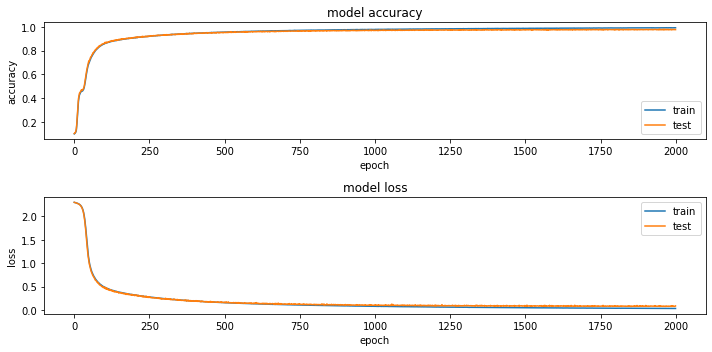

In [10]:
fig = plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.plot(train_acc_all)
plt.plot(test_acc_all)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(train_loss_all)
plt.plot(test_loss_all)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['train'], loc='upper right')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [11]:
torch.save(mlp, "mlp.pkl")
net_load = torch.load("mlp.pkl")
net_load.eval()

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=512, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.2, inplace=False)
  (4): Linear(in_features=512, out_features=512, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.2, inplace=False)
  (7): Linear(in_features=512, out_features=512, bias=True)
  (8): ReLU()
  (9): Dropout(p=0.2, inplace=False)
  (10): Linear(in_features=512, out_features=10, bias=True)
)

In [12]:
for X,y in test_loader:
    break
y_hat = net_load(X)

In [13]:
y_hat[0].reshape(-1,10).shape

torch.Size([1, 10])

In [14]:
score,pred = torch.max(torch.softmax(y_hat[:10],dim = 1), 1)
score,pred,y[:10]

(tensor([1.0000, 0.9998, 1.0000, 0.9996, 0.9804, 1.0000, 0.9999, 1.0000, 1.0000,
         1.0000], grad_fn=<MaxBackward0>),
 tensor([0, 8, 9, 5, 7, 2, 4, 6, 3, 4]),
 tensor([0, 8, 9, 5, 7, 2, 4, 6, 3, 4]))

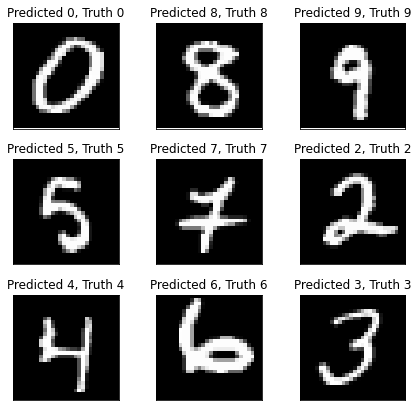

In [15]:
fig = plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X[i].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Truth {}".format(pred[i],y[i]))
    plt.xticks([])
    plt.yticks([])

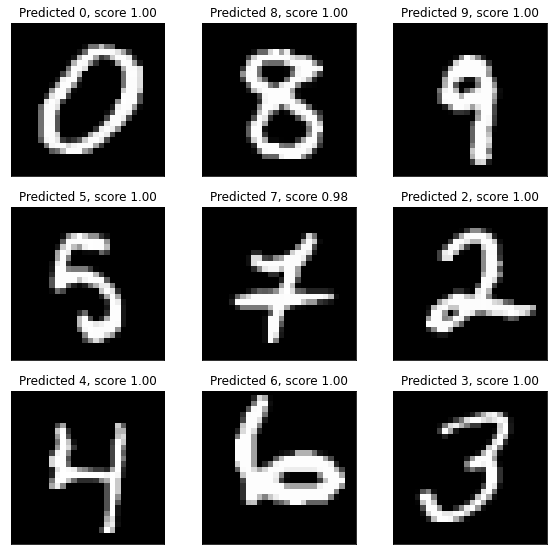

In [16]:
fig = plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X[i].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, score {:.2f}".format(pred[i],score[i]))
    plt.xticks([])
    plt.yticks([])

In [1]:
import tensorflow
print(tensorflow.__version__)
from tensorflow.keras import backend as K
from tensorflow import keras
from datetime import datetime
from tensorflow.keras import regularizers

2.8.0


In [2]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.python.keras.layers import AveragePooling2D
from tensorflow.python.keras.layers import MaxPooling2D
from tensorflow.python.keras.layers import Conv2D
from tensorflow.python.keras.layers import Activation
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.layers import Flatten
from tensorflow.python.keras.layers import Input
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import concatenate

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.utils import np_utils   

In [4]:
from tensorflow.python.keras import Model
from tensorflow.keras.models import load_model
from tensorflow.python.keras import Sequential

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)
nb_classes = 10
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
print("Y_train shape", Y_train.shape)
print("Y_test shape", Y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Y_train shape (60000, 10)
Y_test shape (10000, 10)


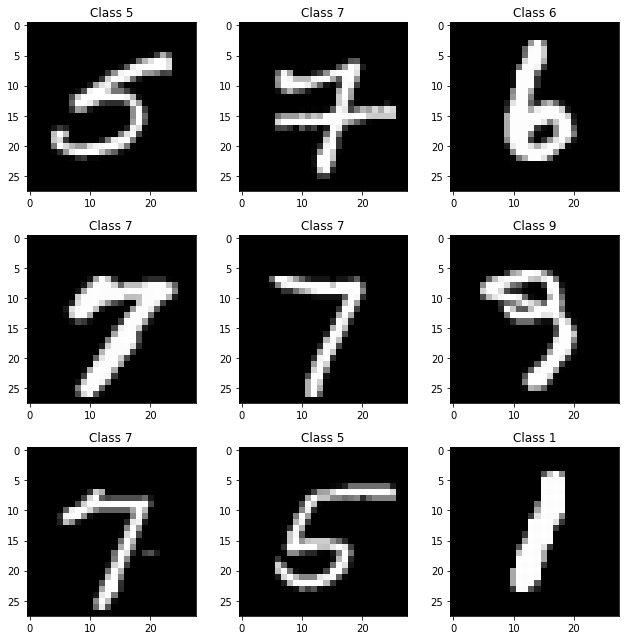

In [6]:
plt.rcParams['figure.figsize'] = (9,9)

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

In [7]:
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

matprint(X_train[num])

0  0  0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0    0    0    0    0    0   86  197  255  139  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0    0    0    0    0    0  253  251  253  251  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0    0    0    0    0    0  254  253  254  253  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0    0    0    0    0    0  253  251  253  251  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0    0    0    0    0    0  254  253  254  253  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0    0    0    0    0  114  253  251  253  251

In [8]:
print(y_train[num])

1


In [9]:
datagen = ImageDataGenerator(rotation_range=10, # rotation
                             width_shift_range=0.1, # horizontal shift
                             height_shift_range=0.1, # vertical shift
                             zoom_range=0.2, # zoom
                             horizontal_flip=False, # horizontal flip
                             brightness_range=[0.8,1.2]) # brightness

In [10]:
aug_iter = datagen.flow(X_train.reshape(60000, 28, 28, 1), Y_train, batch_size=1)
print(type(aug_iter))
# print(np.shape(aug_iter))
print(len(aug_iter))
print(len(aug_iter[0]))
print(len(aug_iter[0][0]))
print(len(aug_iter) * len(aug_iter[0][0]))
print(type(aug_iter[0][0][0]))
print(aug_iter[0][0][0].shape)
print(type(aug_iter[0][1][0]))
print(aug_iter[0][1][0].shape)

<class 'keras.preprocessing.image.NumpyArrayIterator'>
60000
2
1
60000
<class 'numpy.ndarray'>
(28, 28, 1)
<class 'numpy.ndarray'>
(10,)


In [11]:
matprint(aug_iter[num][0][0].reshape(28, 28))

0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  
0  0  0  0  0  0  0    0    0    0    0    6   29   73  148  238  151   41    2    0    0    0    0    0    0   0  0  0  
0  0  0  0  0  0  0    0    0    2   33  109  196  219  215  195  212   84   11    0    0    0    0    0    0   0  0  0  
0  0  0  0  0  0  0    0    1   58  153  225  218  112   58   39  101  129   65    1    0    0    0    7    7   2  0  0  
0  0  0  0  0  0  0    0   48  162  228  183   88   15    0    0   57  191  156   33    0    0   12  117   81  21  0  0  
0  0  0  0  0  0  0   19  138  221  172   58    8    0    0    0   15   89   77    7    5   45  179  255  132  31  0  0  
0  0  0  0  0  0  0   79

In [12]:
X_train_dg, Y_train_dg = np.zeros(shape=(60000, 28, 28)), np.zeros(shape=(60000, 10))
# X_train_dg_ori, Y_train_dg_ori = aug_iter[:, 0, :], aug_iter[:, 1, :]
cnt = 0
for i in range(60000):
    X_train_dg[cnt] = aug_iter[i][0][0].reshape(28, 28)
    Y_train_dg[cnt] = aug_iter[i][1][0].reshape(10,)
    cnt += 1
    if cnt % 5000 == 0:
        print("Data Generating ... cnt ->", cnt)
# print("X_train_dg_ori shape", X_train_dg_ori.shape)
# print("Y_train_dg_ori shape", Y_train_dg_ori.shape)

Data Generating ... cnt -> 5000
Data Generating ... cnt -> 10000
Data Generating ... cnt -> 15000
Data Generating ... cnt -> 20000
Data Generating ... cnt -> 25000
Data Generating ... cnt -> 30000
Data Generating ... cnt -> 35000
Data Generating ... cnt -> 40000
Data Generating ... cnt -> 45000
Data Generating ... cnt -> 50000
Data Generating ... cnt -> 55000
Data Generating ... cnt -> 60000


In [13]:
# X_train_dg = X_train_dg.reshape(60032, 28, 28)
print("X_train_dg shape", X_train_dg.shape)
print("Y_train_dg shape", Y_train_dg.shape)

X_train_dg shape (60000, 28, 28)
Y_train_dg shape (60000, 10)


In [14]:
matprint(X_train_dg[num])

0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0  0  0  0  
0  0  0  0  0    0    0    0    0    0    5   16   32   57   76   45   14    0    0    0    0    0    0   0   0  0  0  0  
0  0  0  0  0    0    0    0    4   44  110  150  155  160  174  153   63    6    0    0    0    0    0   0   0  0  0  0  
0  0  0  0  0    0    3   23  132  194  193  130   65   45   43  102   92   37    0    0    0    0    0   0   0  0  0  0  
0  0  0  0  0    7   59  150  204  129   50   10    0    0    4   56  160   98   18    0    0    1   31  26   9  0  0  0  
0  0  0  0  0   

In [15]:
print(Y_train_dg[num])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


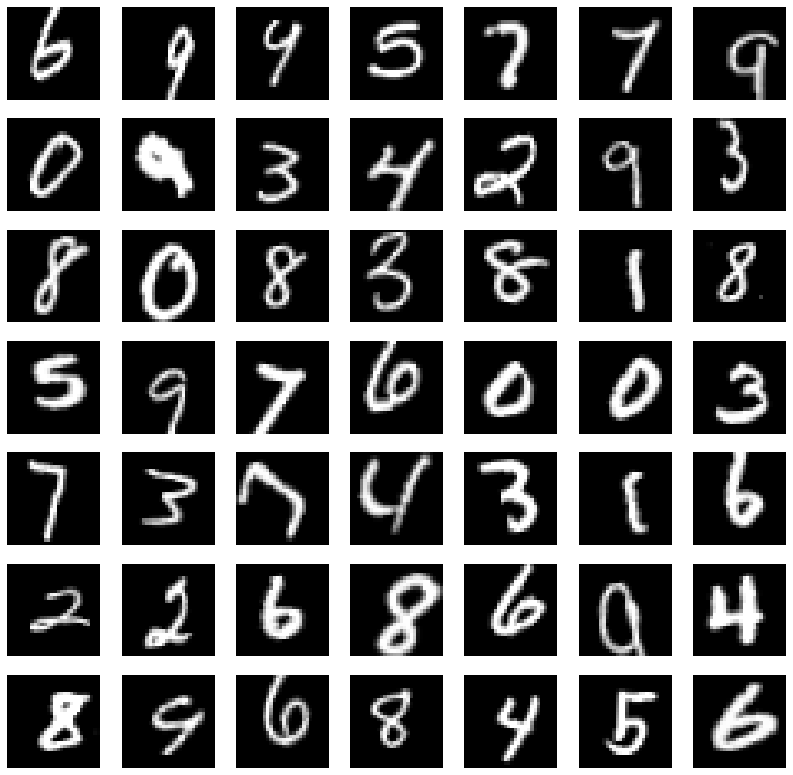

In [16]:
# aug_iter = datagen.flow(X_train.reshape(60000, 28, 28, 1), batch_size=1)
fig, ax = plt.subplots(nrows=7, ncols=7, figsize=(14, 14))
for i in range(49):
    plt.subplot(7, 7, i+1)
    image = next(aug_iter)[0][0].astype('uint8')
    plt.imshow(image, cmap='gray', interpolation='none')
    plt.axis('off')

In [17]:
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)
X_train_dg = X_train_dg.reshape(60000, 28*28)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train_dg = X_train_dg.astype('float32')

X_train /= 255.
X_test /= 255.
X_train_dg /= 255.

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)
print("X_train_dg shape", X_train_dg.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)
X_train_dg shape (60000, 784)


In [18]:
model = Sequential()
model.add(Dense(512, input_shape=(28*28, )))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512, kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512, kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               2

In [20]:
 def train_model(model, useDataGenerator=True, optimizer="Adam",  momentum=False, X_train=X_train, Y_train=Y_train, X_test=X_test, Y_test=Y_test, epoch_num=10000):
    log_dir = "./log/" + ("gd_" if useDataGenerator else "nodg_") + optimizer + "_" + datetime.now().strftime("%Y%m%d-%H%M%S")
    print("log_dir ->", log_dir)
    tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir)
    early_stopping_callback = keras.callbacks.EarlyStopping(monitor='loss', patience=50)
    model.compile(loss='categorical_crossentropy', 
                  optimizer=optimizer,
                  metrics=['accuracy'])
    if momentum:
        K.set_value(model.optimizer.momentum, 0.7)
    K.set_value(model.optimizer.learning_rate, 0.0001)
    if useDataGenerator:
        datagen.flow(X_train.reshape(60000, 28, 28, 1), Y_train, batch_size=128)
        model.fit(X_train_dg, Y_train_dg, 
                  batch_size=128, epochs=epoch_num, verbose=1,
                  callbacks=[tensorboard_callback, early_stopping_callback], 
                  validation_data=(X_test, Y_test))
    else:
        model.fit(X_train, Y_train, batch_size=128, epochs=epoch_num, verbose=1,
                  callbacks=[tensorboard_callback, early_stopping_callback], 
                  validation_data=(X_test, Y_test))
    return model
    # %tensorboard --logdir logs/scalars

In [21]:
MODELS = []
model.save("origin_model.h5")

In [ ]:
MODELS.append(train_model(model=model, useDataGenerator=True, optimizer="SGD", 
                          momentum=True, X_train=X_train, Y_train=Y_train, X_test=X_test, Y_test=Y_test, epoch_num=5000))

log_dir -> ./log/gd_SGD_20220503-235210
Epoch 1/5000
469/469 [==============================] - 3s 5ms/step - loss: 2.6301 - accuracy: 0.1019 - val_loss: 2.6031 - val_accuracy: 0.1140
Epoch 2/5000
469/469 [==============================] - 2s 4ms/step - loss: 2.6233 - accuracy: 0.1042 - val_loss: 2.5934 - val_accuracy: 0.1248
Epoch 3/5000
469/469 [==============================] - 2s 4ms/step - loss: 2.6161 - accuracy: 0.1100 - val_loss: 2.5844 - val_accuracy: 0.1405
Epoch 4/5000
469/469 [==============================] - 2s 4ms/step - loss: 2.6113 - accuracy: 0.1114 - val_loss: 2.5756 - val_accuracy: 0.1593
Epoch 5/5000
469/469 [==============================] - 2s 4ms/step - loss: 2.6057 - accuracy: 0.1147 - val_loss: 2.5673 - val_accuracy: 0.1799
Epoch 6/5000
469/469 [==============================] - 2s 5ms/step - loss: 2.5993 - accuracy: 0.1213 - val_loss: 2.5591 - val_accuracy: 0.2028
Epoch 7/5000
469/469 [==============================] - 2s 5ms/step - loss: 2.5944 - accuracy: 0

469/469 [==============================] - 2s 5ms/step - loss: 2.3143 - accuracy: 0.3802 - val_loss: 2.0480 - val_accuracy: 0.6997
Epoch 58/5000
469/469 [==============================] - 2s 4ms/step - loss: 2.3064 - accuracy: 0.3835 - val_loss: 2.0337 - val_accuracy: 0.7016
Epoch 59/5000
469/469 [==============================] - 2s 5ms/step - loss: 2.2993 - accuracy: 0.3866 - val_loss: 2.0192 - val_accuracy: 0.7042
Epoch 60/5000
469/469 [==============================] - 2s 5ms/step - loss: 2.2901 - accuracy: 0.3915 - val_loss: 2.0046 - val_accuracy: 0.7058
Epoch 61/5000
469/469 [==============================] - 2s 5ms/step - loss: 2.2833 - accuracy: 0.3931 - val_loss: 1.9900 - val_accuracy: 0.7081
Epoch 62/5000
469/469 [==============================] - 2s 5ms/step - loss: 2.2725 - accuracy: 0.3972 - val_loss: 1.9751 - val_accuracy: 0.7094
Epoch 63/5000
469/469 [==============================] - 2s 5ms/step - loss: 2.2653 - accuracy: 0.4004 - val_loss: 1.9601 - val_accuracy: 0.7111

469/469 [==============================] - 2s 4ms/step - loss: 1.8892 - accuracy: 0.4902 - val_loss: 1.3101 - val_accuracy: 0.7819
Epoch 114/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.8830 - accuracy: 0.4906 - val_loss: 1.3017 - val_accuracy: 0.7833
Epoch 115/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.8806 - accuracy: 0.4913 - val_loss: 1.2935 - val_accuracy: 0.7848
Epoch 116/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.8767 - accuracy: 0.4927 - val_loss: 1.2856 - val_accuracy: 0.7857
Epoch 117/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.8712 - accuracy: 0.4937 - val_loss: 1.2777 - val_accuracy: 0.7861
Epoch 118/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.8630 - accuracy: 0.4959 - val_loss: 1.2699 - val_accuracy: 0.7876
Epoch 119/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.8590 - accuracy: 0.4975 - val_loss: 1.2624 - val_accuracy: 

469/469 [==============================] - 2s 5ms/step - loss: 1.6858 - accuracy: 0.5495 - val_loss: 1.0339 - val_accuracy: 0.8245
Epoch 170/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.6822 - accuracy: 0.5508 - val_loss: 1.0312 - val_accuracy: 0.8256
Epoch 171/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.6793 - accuracy: 0.5512 - val_loss: 1.0285 - val_accuracy: 0.8257
Epoch 172/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.6770 - accuracy: 0.5552 - val_loss: 1.0259 - val_accuracy: 0.8267
Epoch 173/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.6744 - accuracy: 0.5537 - val_loss: 1.0232 - val_accuracy: 0.8270
Epoch 174/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.6716 - accuracy: 0.5548 - val_loss: 1.0207 - val_accuracy: 0.8276
Epoch 175/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.6700 - accuracy: 0.5548 - val_loss: 1.0181 - val_accuracy: 

469/469 [==============================] - 2s 5ms/step - loss: 1.5565 - accuracy: 0.5956 - val_loss: 0.9226 - val_accuracy: 0.8507
Epoch 226/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.5560 - accuracy: 0.5978 - val_loss: 0.9210 - val_accuracy: 0.8509
Epoch 227/5000
469/469 [==============================] - 3s 6ms/step - loss: 1.5542 - accuracy: 0.5973 - val_loss: 0.9195 - val_accuracy: 0.8512
Epoch 228/5000
469/469 [==============================] - 2s 4ms/step - loss: 1.5551 - accuracy: 0.5956 - val_loss: 0.9181 - val_accuracy: 0.8515
Epoch 229/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.5516 - accuracy: 0.5970 - val_loss: 0.9166 - val_accuracy: 0.8519
Epoch 230/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.5484 - accuracy: 0.5979 - val_loss: 0.9151 - val_accuracy: 0.8522
Epoch 231/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.5473 - accuracy: 0.6005 - val_loss: 0.9137 - val_accuracy: 

469/469 [==============================] - 2s 5ms/step - loss: 1.4566 - accuracy: 0.6330 - val_loss: 0.8502 - val_accuracy: 0.8704
Epoch 282/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.4521 - accuracy: 0.6322 - val_loss: 0.8491 - val_accuracy: 0.8709
Epoch 283/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.4537 - accuracy: 0.6323 - val_loss: 0.8481 - val_accuracy: 0.8713
Epoch 284/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.4507 - accuracy: 0.6320 - val_loss: 0.8469 - val_accuracy: 0.8713
Epoch 285/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.4481 - accuracy: 0.6336 - val_loss: 0.8458 - val_accuracy: 0.8717
Epoch 286/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.4467 - accuracy: 0.6342 - val_loss: 0.8447 - val_accuracy: 0.8720
Epoch 287/5000
469/469 [==============================] - 2s 4ms/step - loss: 1.4449 - accuracy: 0.6345 - val_loss: 0.8436 - val_accuracy: 

469/469 [==============================] - 2s 5ms/step - loss: 1.3631 - accuracy: 0.6653 - val_loss: 0.7925 - val_accuracy: 0.8844
Epoch 338/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.3622 - accuracy: 0.6654 - val_loss: 0.7916 - val_accuracy: 0.8849
Epoch 339/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.3629 - accuracy: 0.6645 - val_loss: 0.7906 - val_accuracy: 0.8850
Epoch 340/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.3570 - accuracy: 0.6677 - val_loss: 0.7897 - val_accuracy: 0.8854
Epoch 341/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.3576 - accuracy: 0.6657 - val_loss: 0.7887 - val_accuracy: 0.8855
Epoch 342/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.3542 - accuracy: 0.6668 - val_loss: 0.7879 - val_accuracy: 0.8860
Epoch 343/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.3541 - accuracy: 0.6679 - val_loss: 0.7869 - val_accuracy: 

469/469 [==============================] - 2s 5ms/step - loss: 1.2789 - accuracy: 0.6934 - val_loss: 0.7436 - val_accuracy: 0.8979
Epoch 394/5000
469/469 [==============================] - 3s 6ms/step - loss: 1.2798 - accuracy: 0.6935 - val_loss: 0.7427 - val_accuracy: 0.8978
Epoch 395/5000
469/469 [==============================] - 3s 6ms/step - loss: 1.2802 - accuracy: 0.6949 - val_loss: 0.7420 - val_accuracy: 0.8984
Epoch 396/5000
469/469 [==============================] - 3s 6ms/step - loss: 1.2766 - accuracy: 0.6952 - val_loss: 0.7411 - val_accuracy: 0.8987
Epoch 397/5000
469/469 [==============================] - 3s 6ms/step - loss: 1.2738 - accuracy: 0.6955 - val_loss: 0.7403 - val_accuracy: 0.8988
Epoch 398/5000
469/469 [==============================] - 3s 7ms/step - loss: 1.2735 - accuracy: 0.6964 - val_loss: 0.7395 - val_accuracy: 0.8990
Epoch 399/5000
469/469 [==============================] - 3s 7ms/step - loss: 1.2725 - accuracy: 0.6959 - val_loss: 0.7387 - val_accuracy: 

469/469 [==============================] - 3s 6ms/step - loss: 1.2072 - accuracy: 0.7190 - val_loss: 0.7010 - val_accuracy: 0.9075
Epoch 450/5000
469/469 [==============================] - 3s 6ms/step - loss: 1.2050 - accuracy: 0.7189 - val_loss: 0.7003 - val_accuracy: 0.9075
Epoch 451/5000
469/469 [==============================] - 3s 7ms/step - loss: 1.1992 - accuracy: 0.7211 - val_loss: 0.6996 - val_accuracy: 0.9076
Epoch 452/5000
469/469 [==============================] - 3s 7ms/step - loss: 1.2009 - accuracy: 0.7215 - val_loss: 0.6988 - val_accuracy: 0.9075
Epoch 453/5000
469/469 [==============================] - 4s 8ms/step - loss: 1.1995 - accuracy: 0.7203 - val_loss: 0.6982 - val_accuracy: 0.9076
Epoch 454/5000
469/469 [==============================] - 4s 8ms/step - loss: 1.1998 - accuracy: 0.7202 - val_loss: 0.6975 - val_accuracy: 0.9077
Epoch 455/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.1994 - accuracy: 0.7212 - val_loss: 0.6967 - val_accuracy: 

469/469 [==============================] - 2s 4ms/step - loss: 1.1366 - accuracy: 0.7418 - val_loss: 0.6633 - val_accuracy: 0.9142
Epoch 506/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.1334 - accuracy: 0.7437 - val_loss: 0.6627 - val_accuracy: 0.9143
Epoch 507/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.1296 - accuracy: 0.7434 - val_loss: 0.6621 - val_accuracy: 0.9144
Epoch 508/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.1286 - accuracy: 0.7446 - val_loss: 0.6614 - val_accuracy: 0.9143
Epoch 509/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.1288 - accuracy: 0.7460 - val_loss: 0.6608 - val_accuracy: 0.9144
Epoch 510/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.1302 - accuracy: 0.7440 - val_loss: 0.6602 - val_accuracy: 0.9146
Epoch 511/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.1285 - accuracy: 0.7442 - val_loss: 0.6596 - val_accuracy: 

469/469 [==============================] - 3s 6ms/step - loss: 1.0717 - accuracy: 0.7638 - val_loss: 0.6303 - val_accuracy: 0.9204
Epoch 562/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.0722 - accuracy: 0.7643 - val_loss: 0.6298 - val_accuracy: 0.9206
Epoch 563/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.0678 - accuracy: 0.7659 - val_loss: 0.6293 - val_accuracy: 0.9208
Epoch 564/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.0667 - accuracy: 0.7652 - val_loss: 0.6287 - val_accuracy: 0.9206
Epoch 565/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.0659 - accuracy: 0.7644 - val_loss: 0.6281 - val_accuracy: 0.9209
Epoch 566/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.0664 - accuracy: 0.7664 - val_loss: 0.6275 - val_accuracy: 0.9210
Epoch 567/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.0653 - accuracy: 0.7663 - val_loss: 0.6270 - val_accuracy: 

469/469 [==============================] - 2s 5ms/step - loss: 1.0129 - accuracy: 0.7822 - val_loss: 0.6013 - val_accuracy: 0.9277
Epoch 618/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.0151 - accuracy: 0.7832 - val_loss: 0.6008 - val_accuracy: 0.9280
Epoch 619/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.0099 - accuracy: 0.7824 - val_loss: 0.6003 - val_accuracy: 0.9281
Epoch 620/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.0121 - accuracy: 0.7834 - val_loss: 0.5998 - val_accuracy: 0.9281
Epoch 621/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.0104 - accuracy: 0.7851 - val_loss: 0.5993 - val_accuracy: 0.9280
Epoch 622/5000
469/469 [==============================] - 2s 5ms/step - loss: 1.0099 - accuracy: 0.7829 - val_loss: 0.5989 - val_accuracy: 0.9279
Epoch 623/5000
469/469 [==============================] - 3s 5ms/step - loss: 1.0101 - accuracy: 0.7838 - val_loss: 0.5984 - val_accuracy: 

469/469 [==============================] - 2s 5ms/step - loss: 0.9653 - accuracy: 0.7972 - val_loss: 0.5764 - val_accuracy: 0.9327
Epoch 674/5000
469/469 [==============================] - 3s 6ms/step - loss: 0.9639 - accuracy: 0.7981 - val_loss: 0.5759 - val_accuracy: 0.9324
Epoch 675/5000
469/469 [==============================] - 2s 5ms/step - loss: 0.9634 - accuracy: 0.7998 - val_loss: 0.5755 - val_accuracy: 0.9327
Epoch 676/5000
469/469 [==============================] - 2s 5ms/step - loss: 0.9622 - accuracy: 0.7995 - val_loss: 0.5751 - val_accuracy: 0.9326
Epoch 677/5000
469/469 [==============================] - 2s 5ms/step - loss: 0.9611 - accuracy: 0.8001 - val_loss: 0.5747 - val_accuracy: 0.9326
Epoch 678/5000
469/469 [==============================] - 4s 8ms/step - loss: 0.9600 - accuracy: 0.7991 - val_loss: 0.5742 - val_accuracy: 0.9329
Epoch 679/5000
469/469 [==============================] - 3s 7ms/step - loss: 0.9586 - accuracy: 0.7998 - val_loss: 0.5738 - val_accuracy: 

469/469 [==============================] - 2s 5ms/step - loss: 0.9226 - accuracy: 0.8116 - val_loss: 0.5548 - val_accuracy: 0.9361
Epoch 730/5000
469/469 [==============================] - 3s 5ms/step - loss: 0.9241 - accuracy: 0.8104 - val_loss: 0.5545 - val_accuracy: 0.9362
Epoch 731/5000
469/469 [==============================] - 2s 4ms/step - loss: 0.9227 - accuracy: 0.8133 - val_loss: 0.5541 - val_accuracy: 0.9362
Epoch 732/5000
469/469 [==============================] - 2s 5ms/step - loss: 0.9224 - accuracy: 0.8110 - val_loss: 0.5538 - val_accuracy: 0.9361
Epoch 733/5000
469/469 [==============================] - 2s 5ms/step - loss: 0.9219 - accuracy: 0.8119 - val_loss: 0.5534 - val_accuracy: 0.9362
Epoch 734/5000
469/469 [==============================] - 3s 7ms/step - loss: 0.9210 - accuracy: 0.8130 - val_loss: 0.5530 - val_accuracy: 0.9365
Epoch 735/5000
469/469 [==============================] - 4s 8ms/step - loss: 0.9225 - accuracy: 0.8110 - val_loss: 0.5528 - val_accuracy: 

469/469 [==============================] - 2s 5ms/step - loss: 0.8838 - accuracy: 0.8234 - val_loss: 0.5365 - val_accuracy: 0.9402
Epoch 786/5000
469/469 [==============================] - 2s 4ms/step - loss: 0.8837 - accuracy: 0.8232 - val_loss: 0.5361 - val_accuracy: 0.9402
Epoch 787/5000
469/469 [==============================] - 2s 5ms/step - loss: 0.8853 - accuracy: 0.8237 - val_loss: 0.5359 - val_accuracy: 0.9403
Epoch 788/5000
469/469 [==============================] - 2s 5ms/step - loss: 0.8841 - accuracy: 0.8246 - val_loss: 0.5356 - val_accuracy: 0.9403
Epoch 789/5000
469/469 [==============================] - 2s 5ms/step - loss: 0.8819 - accuracy: 0.8247 - val_loss: 0.5353 - val_accuracy: 0.9405
Epoch 790/5000
469/469 [==============================] - 2s 5ms/step - loss: 0.8825 - accuracy: 0.8235 - val_loss: 0.5350 - val_accuracy: 0.9405
Epoch 791/5000
469/469 [==============================] - 2s 5ms/step - loss: 0.8831 - accuracy: 0.8253 - val_loss: 0.5347 - val_accuracy: 

In [ ]:
MODELS.append(train_model(model=load_model("origin_model.h5"), useDataGenerator=True, optimizer="SGD",  momentum=False, 
                          X_train=X_train, Y_train=Y_train, X_test=X_test, Y_test=Y_test, epoch_num=5000))

In [ ]:
MODELS.append(train_modelmodel=load_model("origin_model.h5"), useDataGenerator=True, optimizer="Adam",  momentum=False, 
              X_train=X_train, Y_train=Y_train, X_test=X_test, Y_test=Y_test, epoch_num=2500)

In [ ]:
MODELS.append(train_model(model=load_model("origin_model.h5"), useDataGenerator=False, optimizer="SGD", 
                          momentum=True, X_train=X_train, Y_train=Y_train, X_test=X_test, Y_test=Y_test, epoch_num=5000))

In [ ]:
MODELS.append(train_model(model=load_model("origin_model.h5"), useDataGenerator=False, optimizer="SGD",  momentum=False, 
                          X_train=X_train, Y_train=Y_train, X_test=X_test, Y_test=Y_test, epoch_num=5000))

In [ ]:
MODELS.append(train_model(model=load_model("origin_model.h5"), useDataGenerator=False, optimizer="Adam",  momentum=False, 
                          X_train=X_train, Y_train=Y_train, X_test=X_test, Y_test=Y_test, epoch_num=2500))

In [ ]:
def model_eval(model):
    score = model.evaluate(X_test, Y_test)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

In [ ]:
for model in MODELS:
    model_eval(model)
    predicted_classes = model.predict_classes(X_test)
    correct_indices = np.nonzero(predicted_classes == y_test)[0]
    incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
    
    plt.figure()
    for i, correct in enumerate(correct_indices[:9]):
        plt.subplot(3,6,i+1)
        plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
        plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.tight_layout()
    print("=" * 80)

# End